In [1]:
!pip install keras
import numpy as np
import keras
from keras.datasets import mnist
np.random.seed(400)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print ('xtrain',x_train.shape)
print ('ytrain',y_train.shape)
print ('xtest',x_test.shape)
print ('ytest',y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
xtrain (60000, 28, 28)
ytrain (60000,)
xtest (10000, 28, 28)
ytest (10000,)


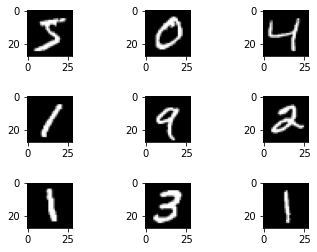

In [3]:
from matplotlib import pyplot as plt

for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i] , cmap='gray')
  plt.subplots_adjust(hspace=0.9)
  

In [4]:
print('min',x_train.min())
print('max',x_train.max())

min 0
max 255


In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print('min',x_train.min())
print('max',x_train.max())

min 0.0
max 1.0


In [6]:
from keras.utils import np_utils
print (y_train[5])

2


In [7]:
#onehot kardan
y_train= np_utils.to_categorical(y_train,10)
y_test= np_utils.to_categorical(y_test,10)
print (y_train[5])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [8]:

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation

model = Sequential()
model.add(Dense(1000, activation='sigmoid' , input_shape=(784,) ))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()
#model.add(Dense(1000, activation='sigmoid'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 2,797,010
Trainable params: 2,797,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

In [11]:
model.fit( x_train,y_train,epochs=3,verbose=1 )

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3100 - accuracy: 0.1155
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2623 - accuracy: 0.1639
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0934 - accuracy: 0.3300


In [ ]:
score = model.evaluate (x_test , y_test ,verbose = 0)

In [ ]:
print(model.metrics_names)
print('test loss',score[0])
print('test acc',score[1])

['loss', 'accuracy']
test loss 2.309405565261841
test acc 0.09799999743700027
